<a href="https://colab.research.google.com/github/bs3537/DS-Unit-2-Applied-Modeling/blob/master/Version3_Shapely_Plots_Final_Lambda_Project_no_log_transformed_XGBoostRegressor_Applied_Modelling_Bhav_DengueAI_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
#https://www.drivendata.org/competitions/44/dengai-predicting-disease-spread/page/80/

In [0]:
#Your goal is to predict the total_cases label for each (city, year, weekofyear) in the test set. 

In [0]:
#Performance metric = mean absolute error

##LIST OF FEATURES:
You are provided the following set of information on a (year, weekofyear) timescale:

(Where appropriate, units are provided as a _unit suffix on the feature name.)

###City and date indicators
1. city – City abbreviations: sj for San Juan and iq for Iquitos
2. week_start_date – Date given in yyyy-mm-dd format
###NOAA's GHCN daily climate data weather station measurements
1. station_max_temp_c – Maximum temperature
2. station_min_temp_c – Minimum temperature
3. station_avg_temp_c – Average temperature
4. station_precip_mm – Total precipitation
5. station_diur_temp_rng_c – Diurnal temperature range

###PERSIANN satellite precipitation measurements (0.25x0.25 degree scale)

6. precipitation_amt_mm – Total precipitation

###NOAA's NCEP Climate Forecast System Reanalysis measurements (0.5x0.5 degree scale)

7. reanalysis_sat_precip_amt_mm – Total precipitation
8. reanalysis_dew_point_temp_k – Mean dew point temperature
9. reanalysis_air_temp_k – Mean air temperature
10. reanalysis_relative_humidity_percent – Mean relative humidity
11. reanalysis_specific_humidity_g_per_kg – Mean specific humidity
12. reanalysis_precip_amt_kg_per_m2 – Total precipitation
13. reanalysis_max_air_temp_k – Maximum air temperature
14. reanalysis_min_air_temp_k – Minimum air temperature
15. reanalysis_avg_temp_k – Average air temperature
16. reanalysis_tdtr_k – Diurnal temperature range

###Satellite vegetation - Normalized difference vegetation index (NDVI) - NOAA's CDR Normalized Difference Vegetation Index (0.5x0.5 degree scale) measurements
17. ndvi_se – Pixel southeast of city centroid
18. ndvi_sw – Pixel southwest of city centroid
19. ndvi_ne – Pixel northeast of city centroid
20. ndvi_nw – Pixel northwest of city centroid

####TARGET VARIABLE = total_cases label for each (city, year, weekofyear)

In [0]:
import sys

In [0]:
#Load train features and labels datasets
train_features = pd.read_csv('https://s3.amazonaws.com/drivendata/data/44/public/dengue_features_train.csv')

In [7]:
train_features.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [8]:
train_features.shape

(1456, 24)

In [0]:
train_labels = pd.read_csv('https://s3.amazonaws.com/drivendata/data/44/public/dengue_labels_train.csv')

In [10]:
train_labels.head()

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6


In [11]:
train_labels.shape

(1456, 4)

In [0]:
#Merge train features and labels datasets

In [0]:
train = pd.merge(train_features, train_labels)

In [14]:
train.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [15]:
train.shape
#city, year and week of year columns are duplicate in train_features and train_labels datasets so the total_cases column is added to the features dataset

(1456, 25)

In [16]:
train.dtypes

city                                      object
year                                       int64
weekofyear                                 int64
week_start_date                           object
ndvi_ne                                  float64
ndvi_nw                                  float64
ndvi_se                                  float64
ndvi_sw                                  float64
precipitation_amt_mm                     float64
reanalysis_air_temp_k                    float64
reanalysis_avg_temp_k                    float64
reanalysis_dew_point_temp_k              float64
reanalysis_max_air_temp_k                float64
reanalysis_min_air_temp_k                float64
reanalysis_precip_amt_kg_per_m2          float64
reanalysis_relative_humidity_percent     float64
reanalysis_sat_precip_amt_mm             float64
reanalysis_specific_humidity_g_per_kg    float64
reanalysis_tdtr_k                        float64
station_avg_temp_c                       float64
station_diur_temp_rn

In [17]:
#Find outliers
train['total_cases'].describe()

count    1456.000000
mean       24.675137
std        43.596000
min         0.000000
25%         5.000000
50%        12.000000
75%        28.000000
max       461.000000
Name: total_cases, dtype: float64

In [0]:
#Remove outliers
train = train[(train['total_cases'] >= np.percentile(train['total_cases'], 0.5)) & 
        (train['total_cases'] <= np.percentile(train['total_cases'], 99.5))]  

In [19]:
train.shape

(1448, 25)

In [20]:
#Do train, val split
from sklearn.model_selection import train_test_split
train, val = train_test_split(train, train_size=0.80, test_size=0.20, 
                              random_state=42)
train.shape, val.shape

((1158, 25), (290, 25))

In [0]:
#Load test features dataset (for the competition)
test = pd.read_csv('https://s3.amazonaws.com/drivendata/data/44/public/dengue_features_test.csv')

In [22]:
test.shape

(416, 24)

In [0]:
#Baseline statistics for the target variable total_cases in train dataset

In [24]:
train['total_cases']. describe()

count    1158.000000
mean       22.301382
std        32.947535
min         0.000000
25%         5.000000
50%        12.000000
75%        27.000000
max       333.000000
Name: total_cases, dtype: float64

In [0]:
#Baseline mean and mean absolute error

In [26]:
guess = train['total_cases'].mean()
print(f'At the baseline, the mean total number of dengue cases in a year is: {guess:.2f}')

At the baseline, the mean total number of dengue cases in a year is: 22.30


In [0]:
#If we had just guessed that the total number of dengue cases was 22.30 for a city in a particular year, we would be off by how much?

In [28]:
from sklearn.metrics import mean_absolute_error

# Arrange y target vectors
target = 'total_cases'
y_train = train[target]
y_val = val[target]

# Get mean baseline
print('Mean Baseline (using 0 features)')
guess = y_train.mean()

# Train Error
y_pred = [guess] * len(y_train)
mae = mean_absolute_error(y_train, y_pred)
print(f'Train mean absolute error: {mae:.2f} dengue cases per year')

# Test Error
y_pred = [guess] * len(y_val)
mae = mean_absolute_error(y_val, y_pred)
print(f'Validation mean absolute error: {mae:.2f} dengue cases per year')

Mean Baseline (using 0 features)
Train mean absolute error: 19.77 dengue cases per year
Validation mean absolute error: 21.46 dengue cases per year


In [0]:
#we need to convert week_start_date to numeric form uisng pd.to_dateime function
#wrangle function 

def wrangle(X):
  X = X.copy()
       
    # Convert week_start_date to numeric form
  X['week_start_date'] = pd.to_datetime(X['week_start_date'], infer_datetime_format=True)
    
    # Extract components from date_recorded, then drop the original column
  X['year_recorded'] = X['week_start_date'].dt.year
  X['month_recorded'] = X['week_start_date'].dt.month
  #X['day_recorded'] = X['week_start_date'].dt.day
  X = X.drop(columns='week_start_date')
  X = X.drop(columns='year')
  X = X.drop(columns='station_precip_mm')

#I engineered few features which represent standing water, high risk feature for mosquitos

  #1. X['standing water feature 1'] = X['station_precip_mm'] / X['station_max_temp_c']
  X['total satellite vegetation index of city'] = X['ndvi_se'] + X['ndvi_sw'] + X['ndvi_ne'] + X['ndvi_nw']
 
    #2. standing water feature 2 = 'NOAA GCN precipitation amount in kg per m2 reanalyzed' * (total vegetation, sum of all 4 parts of the city)
  X['standing water feature 2'] = X['reanalysis_precip_amt_kg_per_m2'] * X['total satellite vegetation index of city'] 
    #3. standing water feature 3: 'NOAA GCN precipitation amount in kg per m2 reanalyzed'} * 'NOAA GCN mean relative humidity in pct reanalyzed'}
  X['standing water feature 3'] = X['reanalysis_precip_amt_kg_per_m2'] * X['reanalysis_relative_humidity_percent']   
    #4. standing water feature 4: 'NOAA GCN precipitation amount in kg per m2 reanalyzed'} * 'NOAA GCN mean relative humidity in pct reanalyzed'} * (total vegetation)
  X['standing water feature 4'] = X['reanalysis_precip_amt_kg_per_m2'] * X['reanalysis_relative_humidity_percent'] * X['total satellite vegetation index of city']  
    # 5. standing water feature 5: 'NOAA GCN precipitation amount in kg per m2 reanalyzed'} / 'NOAA GCN max air temp reanalyzed'
  X['standing water feature 5'] = X['reanalysis_precip_amt_kg_per_m2'] / X['reanalysis_max_air_temp_k']
    #6. standing water feature 6 (most imp): ['NOAA GCN precipitation amount in kg per m2 reanalyzed'} * 'NOAA GCN mean relative humidity in pct reanalyzed'} * (total vegetation)]/['NOAA GCN max air temp reanalyzed']
  X['standing water feature 6'] = X['reanalysis_precip_amt_kg_per_m2'] * X['reanalysis_relative_humidity_percent'] * X['total satellite vegetation index of city'] / X['reanalysis_max_air_temp_k']
    
    # return the wrangled dataframe
  return X

train = wrangle(train)
val = wrangle(val)
test = wrangle(test)

In [30]:
train.head().T

,486,1441,388,1099,1135
city,sj,iq,sj,iq,iq
weekofyear,35,11,42,34,18
ndvi_ne,NaN,0.2946,-0.01515,0.425243,0.27884
ndvi_nw,-0.0331,0.250971,0.0831,0.362483,0.163767
ndvi_se,0.210657,0.281471,0.201867,0.356614,0.191183
ndvi_sw,0.1876,0.341643,0.210733,0.385529,0.326629
precipitation_amt_mm,30.98,121.2,99.33,45.38,65.82
reanalysis_air_temp_k,300.459,299.191,299.479,297.366,297.127
reanalysis_avg_temp_k,300.436,300.929,299.436,298.857,297.829
reanalysis_dew_point_temp_k,296.896,298.45,296.436,293.511,296.709


In [0]:
#Define target and features

In [0]:
# The status_group column is the target
target = 'total_cases'

# Get a dataframe with all train columns except the target
train_features = train.drop(columns=[target])

# Get a list of the numeric features
numeric_features = train_features.select_dtypes(include='number').columns.tolist()

# Get a series with the cardinality of the nonnumeric features
cardinality = train_features.select_dtypes(exclude='number').nunique()

# Get a list of all categorical features with cardinality <= 50
categorical_features = cardinality[cardinality <= 50].index.tolist()

# Combine the lists 
features = numeric_features + categorical_features

In [0]:
# Arrange data into X features matrix and y target vector 
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]


In [34]:
pip install category_encoders

In [0]:
from sklearn.pipeline import make_pipeline
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import model_selection, preprocessing


In [0]:
#Shapely plots don't work with pipeline as model

processor = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(strategy='mean')
)



In [0]:
X_train_processed = processor.fit_transform(X_train)
X_val_processed = processor.transform(X_val)

In [0]:
eval_set = [(X_train_processed, y_train),
            (X_val_processed, y_val)]

In [0]:
model = XGBRegressor(n_estimators=200, objective='reg:squarederror', n_jobs=-1)

In [79]:
model.fit(X_train_processed, y_train, eval_set=eval_set, eval_metric='mae', 
          early_stopping_rounds=10)

[0]	validation_0-mae:19.8844	validation_1-mae:21.6381
Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.

Will train until validation_1-mae hasn't improved in 10 rounds.
[1]	validation_0-mae:18.2173	validation_1-mae:20.0815
[2]	validation_0-mae:16.7979	validation_1-mae:18.8203
[3]	validation_0-mae:15.6411	validation_1-mae:17.6646
[4]	validation_0-mae:14.7789	validation_1-mae:16.8938
[5]	validation_0-mae:14.0403	validation_1-mae:16.1135
[6]	validation_0-mae:13.5447	validation_1-mae:15.6031
[7]	validation_0-mae:13.1449	validation_1-mae:15.068
[8]	validation_0-mae:12.8965	validation_1-mae:14.6776
[9]	validation_0-mae:12.6339	validation_1-mae:14.3605
[10]	validation_0-mae:12.3574	validation_1-mae:13.9289
[11]	validation_0-mae:12.254	validation_1-mae:13.7582
[12]	validation_0-mae:12.0507	validation_1-mae:13.5131
[13]	validation_0-mae:11.9471	validation_1-mae:13.4463
[14]	validation_0-mae:11.7732	validation_1-mae:13.2846
[15]	validation_0-mae:11.7153	

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[39]	validation_0-mae:10.2613	validation_1-mae:12.512
[40]	validation_0-mae:10.2189	validation_1-mae:12.5416
[41]	validation_0-mae:10.1974	validation_1-mae:12.5397
[42]	validation_0-mae:10.1661	validation_1-mae:12.5479
[43]	validation_0-mae:10.1084	validation_1-mae:12.4365
[44]	validation_0-mae:10.0817	validation_1-mae:12.4101
[45]	validation_0-mae:10.0619	validation_1-mae:12.4381
[46]	validation_0-mae:10.0133	validation_1-mae:12.3856
[47]	validation_0-mae:9.99494	validation_1-mae:12.3842
[48]	validation_0-mae:9.93756	validation_1-mae:12.3252
[49]	validation_0-mae:9.91546	validation_1-mae:12.3286
[50]	validation_0-mae:9.85039	validation_1-mae:12.2971
[51]	validation_0-mae:9.83676	validation_1-mae:12.2844
[52]	validation_0-mae:9.77286	validation_1-mae:12.2393
[53]	validation_0-mae:9.74523	validation_1-mae:12.2577
[54]	validation_0-mae:9.68163	validation_1-mae:12.199
[55]	validation_0-mae:9.64692	validation_1-mae:12.2384
[56]	validation_0-mae:9.62617	validation_1-mae:12.258
[57]	validati

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=200,
             n_jobs=-1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

###Shapely Plots

In [84]:
pip install shap

In [110]:
row = X_val.iloc[[10]]
explainer=shap.TreeExplainer(model)
row_processed = processor.transform(row)
shap_values = explainer.shap_values(row_processed)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value,
    shap_values=shap_values,
    features=row_processed
)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


In [93]:
row = X_val.iloc[[100]]
explainer=shap.TreeExplainer(model)
row_processed = processor.transform(row)
shap_values = explainer.shap_values(row_processed)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value,
    shap_values=shap_values,
    features=row_processed
)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


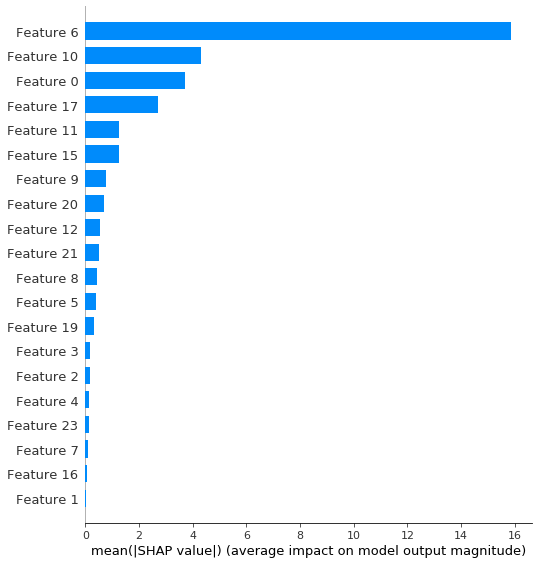

In [95]:
shap.summary_plot(shap_values, X_val_processed, plot_type="bar")

In [114]:
#Explanations for the whole X_val dataset

explainer=shap.TreeExplainer(model)

shap_values = explainer.shap_values(X_val_processed)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value,
    shap_values=shap_values,
    features=X_val_processed
)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


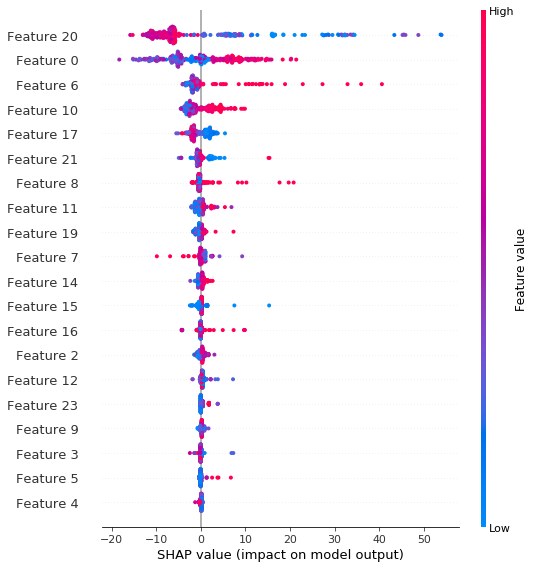

In [115]:
# summarize the effects of all the features for whole X val dataset
shap.summary_plot(shap_values, X_val_processed)